In [1]:
# !pip install tensorflow==2.8.0
# !pip install keras==2.8.0

In [2]:
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator

## Data Preprocessing

In [3]:
train_gen = ImageDataGenerator(rescale=1.0/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_gen = ImageDataGenerator(rescale=1.0/255)

In [4]:
train_dataset = train_gen.flow_from_directory('./dataset/training_set/training_set/', 
                                              target_size=(64,64), batch_size=32, class_mode='binary')

Found 8005 images belonging to 2 classes.


In [5]:
val_dataset = test_gen.flow_from_directory('./dataset/test_set/test_set/',
                                           target_size=(64,64), batch_size=32, class_mode='binary')

Found 2023 images belonging to 2 classes.


In [6]:
train_dataset

## Building of Model

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[64,64,3]))


In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=128,  activation="relu"))

In [14]:
cnn.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [16]:
cnn.compile(optimizer= 'adam', loss="binary_crossentropy", metrics = ['accuracy'])

### Train and do Prediction

In [17]:
history = cnn.fit(x= train_dataset, validation_data=val_dataset, epochs = 5)

Epoch 1/5
251/251 [==============================] - 60s 236ms/step - loss: 0.6768 - accuracy: 0.5651 - val_loss: 0.6275 - val_accuracy: 0.6495
Epoch 2/5
251/251 [==============================] - 61s 245ms/step - loss: 0.5991 - accuracy: 0.6756 - val_loss: 0.5739 - val_accuracy: 0.7000
Epoch 3/5
251/251 [==============================] - 56s 223ms/step - loss: 0.5541 - accuracy: 0.7179 - val_loss: 0.5227 - val_accuracy: 0.7365
Epoch 4/5
251/251 [==============================] - 54s 214ms/step - loss: 0.5252 - accuracy: 0.7334 - val_loss: 0.5423 - val_accuracy: 0.7331
Epoch 5/5
251/251 [==============================] - 54s 213ms/step - loss: 0.4999 - accuracy: 0.7527 - val_loss: 0.4897 - val_accuracy: 0.7682


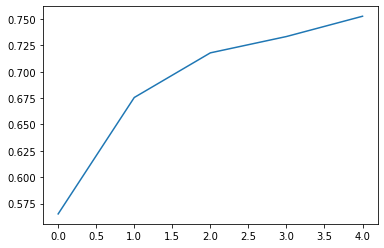

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])

In [19]:
import numpy as np
from keras.preprocessing import image

In [20]:
test_image = image.load_img("dataset/test_set/test_set/cats/cat.4001.jpg", target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
retult = cnn.predict(test_image)
if retult[0][0] == 1:
    print("dog")
else:
    print("cat")    

dog
